# Introduction to Panda

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = [1,2,3,4]
pd.DataFrame(data)

,0
0,1
1,2
2,3
3,4


In [7]:
data = {
    "a": [1,2,3],
    "b":[2.5,.7,5.6],
    "c":["yey", "uhu", "blbl"],
    "d":42
} #python dictionary

In [8]:
df = pd.DataFrame(data)
df
#0,1,2 row index, a,b,c column index

,a,b,c,d
0,1,2.5,yey,42
1,2,0.7,uhu,42
2,3,5.6,blbl,42


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
#access to the eleents of the dictionary
df["a"]

0    1
1    2
2    3
Name: a, dtype: int64

In [11]:
type(df["a"])

pandas.core.series.Series

we see that we have no longer a DataFrame but a Series. Actually it behaves like a numpy array

In [12]:
df["a"]*10

0    10
1    20
2    30
Name: a, dtype: int64

In [15]:
np.cos(df["a"])

0    0.540302
1   -0.416147
2   -0.989992
Name: a, dtype: float64

In [17]:
#series of random integers
#initialize random number generator
rng = np.random.default_rng(7)

s = pd.Series(rng.integers(0, 10, 5))
s

0    9
1    6
2    6
3    8
4    5
dtype: int64

In [18]:
s.sort_values() #sort the values, plus the indices are still attached to the datas

4    5
1    6
2    6
3    8
0    9
dtype: int64

In [19]:
s * s.sort_values()

0    81
1    36
2    36
3    64
4    25
dtype: int64

pandas makes sure you multiply the element zero with the corresponding zero (that now has changed position du eto the sorting)

In [23]:
s.sort_values().reset_index(drop=True)

0    5
1    6
2    6
3    8
4    9
dtype: int64

the reset index prevents the indices to be attached to the datas, so the multiplication by s is different

In [24]:
s*s.sort_values().reset_index(drop=True)

0    45
1    36
2    36
3    64
4    45
dtype: int64

In [26]:
df.dtypes #lists the types of the dataframe
#the "object" means in the place there is a pointer to the variable

a      int64
b    float64
c     object
d      int64
dtype: object

In [27]:
df.shape

(3, 4)

### Useful functions
Head: shows only the first few entries(you can specify how many)

In [28]:
df.head()

,a,b,c,d
0,1,2.5,yey,42
1,2,0.7,uhu,42
2,3,5.6,blbl,42


In [30]:
df.head(2)

,a,b,c,d
0,1,2.5,yey,42
1,2,0.7,uhu,42


Describe: describes the datas inside

In [31]:
df.describe()

,a,b,d
count,3.0,3.000000,3.0
mean,2.0,2.933333,42.0
std,1.0,2.478575,0.0
min,1.0,0.700000,42.0
25%,1.5,1.600000,42.0
50%,2.0,2.500000,42.0
75%,2.5,4.050000,42.0
max,3.0,5.600000,42.0


## Slicing
It's a bit different from numpy, you do not slice directly... we have [], not ()

In [32]:
df

,a,b,c,d
0,1,2.5,yey,42
1,2,0.7,uhu,42
2,3,5.6,blbl,42


In [33]:
df.loc[2]

a       3
b     5.6
c    blbl
d      42
Name: 2, dtype: object

the 2 corresponds to the row position

In [34]:
df.iloc[2]

a       3
b     5.6
c    blbl
d      42
Name: 2, dtype: object

takes the index of the position. It is by chance that this time we get the same with loc and iloc

## Grouped operations

In [36]:


df = pd.DataFrame({'location' : ['Italy', 'France', 'Italy', 'Italy',
                                 'France', 'Italy', 'France', 'France'],
                   'detector' : ['ARCA_DU1', 'ORCA_DU2', 'ARCA_DU3', 'ARCA_DU4',
                                 'ANTARES', 'NEMO', 'ORCA_DU1', 'ORCA_DU5'],
                   'x' : rng.random(8),
                   'y' : rng.random(8)})

df

,location,detector,x,y
0,Italy,ARCA_DU1,0.225207,0.278426
1,France,ORCA_DU2,0.300166,0.254870
2,Italy,ARCA_DU3,0.873553,0.445076
3,Italy,ARCA_DU4,0.005265,0.504548
4,France,ANTARES,0.821228,0.553497
5,Italy,NEMO,0.797069,0.995500
6,France,ORCA_DU1,0.467935,0.792662
7,France,ORCA_DU5,0.303032,0.622179


In [37]:
df.groupby(['location']).groups

{'France': [1, 4, 6, 7], 'Italy': [0, 2, 3, 5]}

In [38]:
df.groupby(['location']).get_group('France')

,location,detector,x,y
1,France,ORCA_DU2,0.300166,0.254870
4,France,ANTARES,0.821228,0.553497
6,France,ORCA_DU1,0.467935,0.792662
7,France,ORCA_DU5,0.303032,0.622179


In [39]:
df_by_location.get_group("France")["x"]

NameError: name 'df_by_location' is not defined

In [40]:


df = pd.DataFrame({
    'event_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'hit_time': [23, 13, 14, 44, 23, 45, 1, 2, 4],
    'pmt_id': [4, 3, 5, 30, 5, 5, 3, 5, 3]
})
df



,event_id,hit_time,pmt_id
0,1,23,4
1,1,13,3
2,1,14,5
3,2,44,30
4,2,23,5
5,3,45,5
6,3,1,3
7,3,2,5
8,3,4,3


In [41]:
df.groupby("event_id")

In [42]:
for name, group_data in df.groupby('event_id'):
    print("Group name: {0}".format(name))
    print(group_data, "\n")



Group name: 1
   event_id  hit_time  pmt_id
0         1        23       4
1         1        13       3
2         1        14       5 

Group name: 2
   event_id  hit_time  pmt_id
3         2        44      30
4         2        23       5 

Group name: 3
   event_id  hit_time  pmt_id
5         3        45       5
6         3         1       3
7         3         2       5
8         3         4       3 



In [43]:
df.groupby("event_id")["hit_time"].min()

event_id
1    13
2    23
3     1
Name: hit_time, dtype: int64

it calls the minimum function on the hit time, after grouping by id. We can call several functions

In [44]:
df.groupby("event_id")["hit_time"].max()

event_id
1    23
2    44
3    45
Name: hit_time, dtype: int64

In [45]:
df.groupby("event_id")["hit_time"].sum()

event_id
1    50
2    67
3    52
Name: hit_time, dtype: int64

In [46]:
df.groupby("event_id")["hit_time"].aggregate("min")

event_id
1    13
2    23
3     1
Name: hit_time, dtype: int64

using aggregate we can call our functions, but also the default ones

In [47]:
df.groupby("event_id")["hit_time"].aggregate([np.min, np.median, sum, min, max])

,amin,median,sum,min,max
event_id,,,,,
1,13,14.0,50,13,23
2,23,33.5,67,23,44
3,1,3.0,52,1,45


Aggregate allows also to call several functions at the same time

## Transformations

In [50]:
N = 1000
index = pd.date_range("2021-06-9", periods=N, freq='D')

date_range creates a set of dates from a certain date, with a period N in steps freq

In [51]:
index

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18',
               ...
               '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
               '2024-03-03', '2024-03-04'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [53]:
ts = pd.Series(rng.normal(0.5, 2, N), index)
ts

2021-06-09    0.061392
2021-06-10    1.045345
2021-06-11   -2.364012
2021-06-12   -2.997202
2021-06-13   -1.632132
                ...   
2024-02-29    0.979581
2024-03-01   -1.733588
2024-03-02    3.120556
2024-03-03    2.702101
2024-03-04    0.970998
Freq: D, Length: 1000, dtype: float64

In [54]:
ts.rolling(window=100, min_periods=100).mean()

2021-06-09         NaN
2021-06-10         NaN
2021-06-11         NaN
2021-06-12         NaN
2021-06-13         NaN
                ...   
2024-02-29    0.435405
2024-03-01    0.369254
2024-03-02    0.389000
2024-03-03    0.412758
2024-03-04    0.411406
Freq: D, Length: 1000, dtype: float64

takes a window of 100 and computes the mean period

In [59]:
transformed = ts.groupby(lambda x: x.year)
transformed.mean()

2021    0.299272
2022    0.659371
2023    0.417748
2024    0.412477
dtype: float64

group by year and compute the mean of the datas

In [60]:
transformed.std()

2021    2.018480
2022    2.182142
2023    1.924632
2024    1.956719
dtype: float64

do the std of the various years

In [56]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std())
transformed

2021-06-09   -0.117851
2021-06-10    0.369621
2021-06-11   -1.319450
2021-06-12   -1.633147
2021-06-13   -0.956860
                ...   
2024-02-29    0.289824
2024-03-01   -1.096767
2024-03-02    1.383989
2024-03-03    1.170134
2024-03-04    0.285437
Freq: D, Length: 1000, dtype: float64

In [62]:
grouped_trans = transformed.groupby(lambda x: x.year)
grouped_trans.mean()

AttributeError: 'SeriesGroupBy' object has no attribute 'groupby'

In [61]:
pd.DataFrame({"Original Data": ts, "Transformed": transformed}).plot();

ValueError: array length 4 does not match index length 1000

we group by year our datas and transform them doing 


## Plotting

In [63]:
df = pd.DataFrame({'foo': np.cumsum(rng.random(1000) - 0.5),
                   'bar': np.cumsum(rng.random(1000) - 0.5),
                   'narf': np.cumsum(rng.random(1000) - 0.5)})

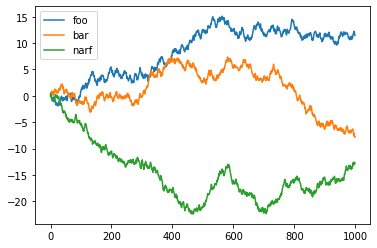

In [64]:
df.plot();  # check out the parameters you can pass to `.plot()` by hitting TAB inside the parentheses

we can plot the dataframe in severla ways. Actually the plot can take as arguments lots of staff (for example using histogram)

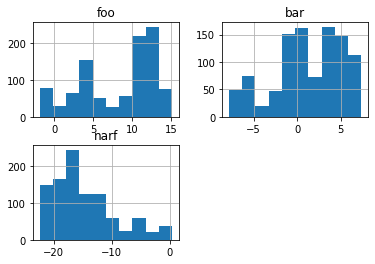

In [65]:
df.hist();

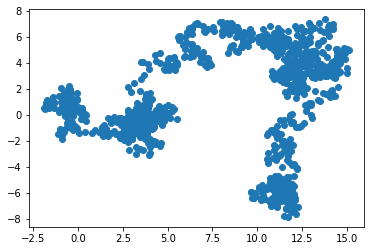

In [68]:
plt.scatter(df['foo'], df['bar']);

## MemoryUsage of Data Frames

In [69]:
data = rng.random((10000000,6))

In [71]:
df = pd.DataFrame(data, columns=list("abcdef"))
df

,a,b,c,d,e,f
0,0.205276,0.332215,0.293063,0.962412,0.235004,0.424549
1,0.485825,0.691176,0.969973,0.613931,0.860611,0.131427
2,0.661392,0.172424,0.871290,0.595554,0.136197,0.850109
3,0.524996,0.485601,0.081173,0.906935,0.513884,0.864574
4,0.075251,0.679681,0.375472,0.536589,0.624309,0.825783
...,...,...,...,...,...,...
9999995,0.174628,0.079137,0.146345,0.890676,0.446744,0.590642
9999996,0.897556,0.305137,0.960294,0.037959,0.668742,0.820813
9999997,0.826270,0.501572,0.323652,0.966024,0.615759,0.984632
9999998,0.377882,0.937459,0.990199,0.594299,0.826451,0.036477


In [72]:
df.tail()

,a,b,c,d,e,f
9999995,0.174628,0.079137,0.146345,0.890676,0.446744,0.590642
9999996,0.897556,0.305137,0.960294,0.037959,0.668742,0.820813
9999997,0.826270,0.501572,0.323652,0.966024,0.615759,0.984632
9999998,0.377882,0.937459,0.990199,0.594299,0.826451,0.036477
9999999,0.253049,0.977842,0.597300,0.765223,0.623187,0.951479


In [73]:
df.head()

,a,b,c,d,e,f
0,0.205276,0.332215,0.293063,0.962412,0.235004,0.424549
1,0.485825,0.691176,0.969973,0.613931,0.860611,0.131427
2,0.661392,0.172424,0.871290,0.595554,0.136197,0.850109
3,0.524996,0.485601,0.081173,0.906935,0.513884,0.864574
4,0.075251,0.679681,0.375472,0.536589,0.624309,0.825783


How much memory does this 10 million entries databes use? we can see it through a function

In [74]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   a       float64
 1   b       float64
 2   c       float64
 3   d       float64
 4   e       float64
 5   f       float64
dtypes: float64(6)
memory usage: 457.8 MB


it uses an insane amount of memory

## Subsampling

In [75]:
data = rng.random((10_000_000, 6))
df = pd.DataFrame(data, columns=list("abcdef"))

In [76]:
df.head(4)

,a,b,c,d,e,f
0,0.406278,0.484189,0.546999,0.832098,0.494845,0.345984
1,0.122239,0.125270,0.867080,0.247132,0.379205,0.420164
2,0.757989,0.198222,0.733716,0.189538,0.619230,0.093410
3,0.889991,0.956499,0.215857,0.098111,0.483003,0.674308


In [79]:
subsample = df.sample(frac=0.1, random_state=42)
subsample

,a,b,c,d,e,f
919213,0.917954,0.874484,0.068058,0.603029,0.575649,0.909539
9467153,0.276973,0.256073,0.156506,0.482537,0.411133,0.386009
6585777,0.202815,0.226545,0.558463,0.867019,0.649226,0.996379
3878022,0.840373,0.048461,0.927104,0.849678,0.391977,0.023459
5537116,0.560336,0.417161,0.730034,0.834796,0.001392,0.048669
...,...,...,...,...,...,...
3553239,0.794497,0.076135,0.452278,0.744491,0.681541,0.579040
1662635,0.350744,0.618511,0.959476,0.707307,0.451088,0.966552
2362261,0.156542,0.517206,0.705851,0.689042,0.800490,0.536671
7669748,0.956793,0.827968,0.928224,0.350174,0.826118,0.855817


we created a subsample because the dataset was huge. We decided to use the 10% (frac=0.1) of the datasemple, pull out randomly. the function subsample does NOT modify the original dataframe.
The sample is now randomly mixed up

In [80]:
remaining = df.drop(subsample.index)
remaining

,a,b,c,d,e,f
0,0.406278,0.484189,0.546999,0.832098,0.494845,0.345984
1,0.122239,0.125270,0.867080,0.247132,0.379205,0.420164
3,0.889991,0.956499,0.215857,0.098111,0.483003,0.674308
4,0.417137,0.586766,0.319208,0.021466,0.710544,0.009521
5,0.292761,0.562650,0.528072,0.745144,0.123438,0.490891
...,...,...,...,...,...,...
9999995,0.015463,0.168677,0.545157,0.709029,0.314902,0.131613
9999996,0.533756,0.576048,0.695440,0.772718,0.943654,0.697988
9999997,0.257426,0.435192,0.267356,0.149986,0.330854,0.453730
9999998,0.807411,0.222648,0.713685,0.818017,0.053508,0.186825


Here we have the remaining rows that we eliminated from the subsample